In [2]:
import numpy as np
import pandas as pd

In [3]:
##import data
##All info about these can be found in the txt file in the data folder
data_feat_train = pd.read_csv("./data/airfoil_self_noise_X_train.csv")
data_feat_test = pd.read_csv("./data/airfoil_self_noise_X_test.csv")
data_label_train = pd.read_csv("./data/airfoil_self_noise_y_train.csv")
data_label_test = pd.read_csv("./data/airfoil_self_noise_y_test.csv")

In [4]:
##Processing the df and transforming it to something useable (returns np array)
X_train, y_train = data_feat_train.values, data_label_train.values
X_test, y_test = data_feat_test.values, data_label_test.values

In [23]:
##Actual Model 
def result(X_test,c): 
    '''Returns the predicted value based off the set given and known coeffs
    c is the coeffients of the linear regressor 
    X is the features, an array of size n
    p(X) = <X,c>'''
    return X_test.dot(c)

def get_cn(X_train, y_train): 
    '''Defines coeff with the training set
    X_train = set of feature vectors 
    y_train = set of label vectors 
     
    c_n = (x^t*x)^-1 * x^t*y'''
    
    X_T = np.transpose(X_train)
    X_TX_inv = np.linalg.inv(X_T.dot(X_train))
    X_TY = X_T.dot(y_train)
    
    return X_TX_inv.dot(X_TY)

def error(y_pred, y_true): 
    '''Mean root square error calculation for two full matrices
    E = sqrt(Sigma((x_t-x_p)^2)/N_x)'''
    error = 0
    T = len(y_pred)
    for i in range(T):
        error += (y_pred[i]-y_true[i])**2
    return np.sqrt(error/T)

def add_vector(X):
    '''adds column to current features'''
    X_ones = np.ones(X.shape[0])
    X_ones = X_ones.reshape(-1,1)
    return np.append(X_ones,X,axis=1)

In [18]:
c = get_cn(X_train,y_train)
y_predict = result(X_test,c)
print(error(y_predict, y_test))
##Prediction is pretty shit bc it doesn't include the bias term (c_o)

[30.99744284]


In [25]:
X_train_new, X_test_new = add_vector(X_train), add_vector(X_test)
c_new = get_cn(X_train_new,y_train)
y_pred_new = result(X_test_new,c_new)
print(error(y_pred_new,y_test))
##Results in a much better prediction

[4.74913107]


In [26]:
##Compare to libary usage, scikit learn 
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()
model.fit(X_train,y_train) ##note we don't need to add the bias term
##Can return all coeff with 
##c_sk = model.coef_ (All the coeff c_1...c_n)
##c_0_sk = model.intercept_ (c_0 term)
y_pred_sk = model.predict(X_test)
print(error(y_pred_sk,y_test))

[4.74913107]


In [29]:
##Plot all this bullshit 
import seaborn as sns ##Lets us use the dataframe from pds

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


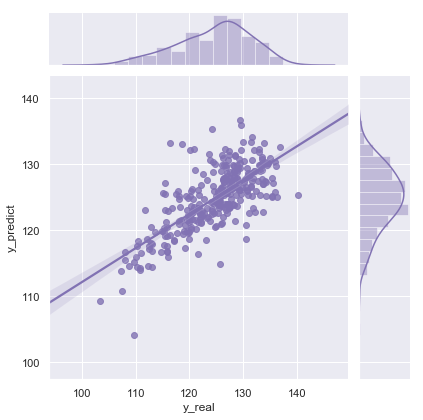

In [31]:
frame = pd.DataFrame(data=y_test[:,0], columns=["y_real"])
frame['y_predict'] = y_pred_new[:,0] ##adding the column with predicted values
sns.set(style = "darkgrid")
plot = sns.jointplot("y_real","y_predict", data = frame, kind = "reg", color = "m")